In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/meng1/Desktop/data_science/Organic-Semi/Organic-Semi/PreML/DescriptorsDataset.csv')
data.head()

,Unnamed: 0,e_gap_alpha,Xch-5d,AXp-0d,AXp-1d,AXp-2d,AXp-3d,AXp-4d,AXp-5d,AXp-6d,AXp-7d,ETA_eta,AETA_eta,ETA_eta_L,ETA_epsilon_3
0,0,1.996881,0.262189,0.655204,0.412925,0.254120,0.158333,0.098975,0.060991,0.038411,0.024199,22.577974,0.752599,6.270874,0.453846
1,1,2.036048,0.458607,0.653042,0.410310,0.250812,0.155235,0.096945,0.058389,0.036704,0.023043,16.897284,0.704054,5.213917,0.454839
2,2,1.693484,0.476265,0.651497,0.408298,0.249048,0.153825,0.095116,0.056878,0.035892,0.022453,25.174481,0.899089,7.045647,0.455556
3,3,1.848455,0.331927,0.653414,0.411399,0.249837,0.152563,0.093787,0.056820,0.034494,0.021676,25.363511,0.874604,6.773586,0.454667
4,4,2.074585,0.380040,0.655204,0.412177,0.256459,0.160971,0.101101,0.061597,0.039310,0.024843,20.323884,0.812955,6.133003,0.453846


In [4]:
X = data[['AXp-0d', 'AXp-1d', 'AXp-2d', 'ETA_eta_L', 'ETA_epsilon_3']].values
Y = data[['e_gap_alpha']].values

In [5]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=1234)

In [6]:
# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train_pn)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)

In [7]:
X_test = X_train_scaler.transform(X_test_pn)

In [24]:
def neural_model():
    # assemble the structure
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [27]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(1234)
# create the NN framework
estimator = KerasRegressor(build_fn=neural_model,
        epochs=400, batch_size=25000, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs=400, 
        batch_size=10000, verbose=0)
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 0.08 and for validation is 0.08


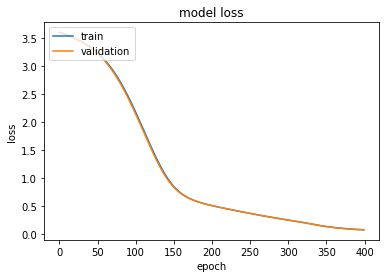

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

(1, 3.5)

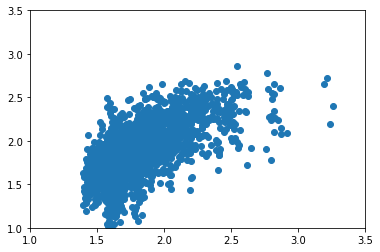

In [37]:
prediction = estimator.predict(X_test)
plt.scatter(prediction, y_test)
plt.xlim(1,3.5)
plt.ylim(1,3.5)